## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
## Alumno: Diego Miguel Trujillo Sierra

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo.

# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con el texto de las siguientes noticias, tienes que ingresar y copiar su contenido. (2 puntos por ambas comprobaciones):
  - Noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
  - Noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/

**Importante**: Activa el tipo de entorno de ejecución con GPU en Google Colab, y elimina los dataframes que no uses luego de las transformaciones para librerar RAM.

# 1. Carga de datos:

Para poder trabajar con el dataset importado desde el drive, se realizaron los siguientes pasos:
1.   Eliminar datos faltantes: Al ser un dataset tan extenso (más de 70 mil elementos), la eliminación de los datos faltantes no generó ningún problema para el rendimiento del modelo.
2.   Stemmer: Con el stemmer, las palabras se reducen a su raíz (stem) para contabilizarlas de forma adecuada. Por ejemplo, las palabras "working" y "work" se consideran como una sola y no como dos palabras distintas.
3.   Stopwords: Se eliminaron palabras de parada o vacías, como artículos ("the", "a", etc.), que no contienen significado en sí, pero que podrían reducir la eficacia del modelo, ya que se repiten demasiado.
4.   Eliminación de palabras específicas: Se eliminaron lgunas palabras específicas como "quot", "twitpic", "image" etc. ya que aparecían demasiado y se referían simplemente a partes de los tweets.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/UCamp/M5/WELFake_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Limpieza de datos
df.dropna(inplace=True)
df["text"] = df["text"].str.lower()

# Stopwords
STOPWORDS = set(stopwords.words("english"))

# Stemmer
stemmer = PorterStemmer()

# Preprocesamiento del texto
df["text"] = df["text"].apply(lambda text: " ".join([stemmer.stem(word) for word in text.split() if word not in STOPWORDS]))

# Convertir etiquetas a categóricas
y = to_categorical(df["label"])

# Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df["text"], y, test_size=0.2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,comment expect barack obama member #fyf911 #fu...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"now, demonstr gather last night exercis consti...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",dozen polit activ pastor came privat dinner fr...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"rs-28 sarmat missile, dub satan 2, replac ss-1...",1
5,5,About Time! Christian Group Sues Amazon and SP...,say one time someon su southern poverti law ce...,1


## Análisis de datos

Se hizo un análisis de datos básico. Primero se hizo una nube de palabras, que fue lo que nos permitió ver qué palabras se estaban repitiendo demasiado sin aportar valor al texto (mencionadas en el apartado de limpieza). Los temas recurrentes son Estados Unidos, Donald Trump, etc.
También se realizó un gráfico de barras con cuenta de noticias falsas y verdaderas. Para este dataset hay ligeramente más noticias falsas. Sin embargo, está bastante equilibrado lo que me permitió trabajar con el df sin necesidad de hacer mayores ajustes a la población.

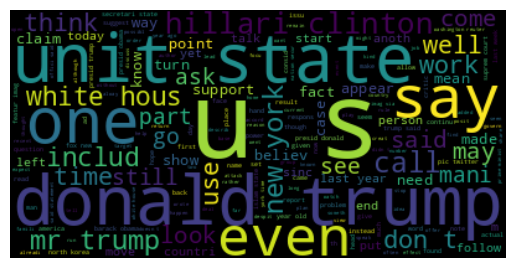

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

all_text = " ".join(df["text"].astype(str))
wc = WordCloud().generate(all_text)

# Display the generated word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


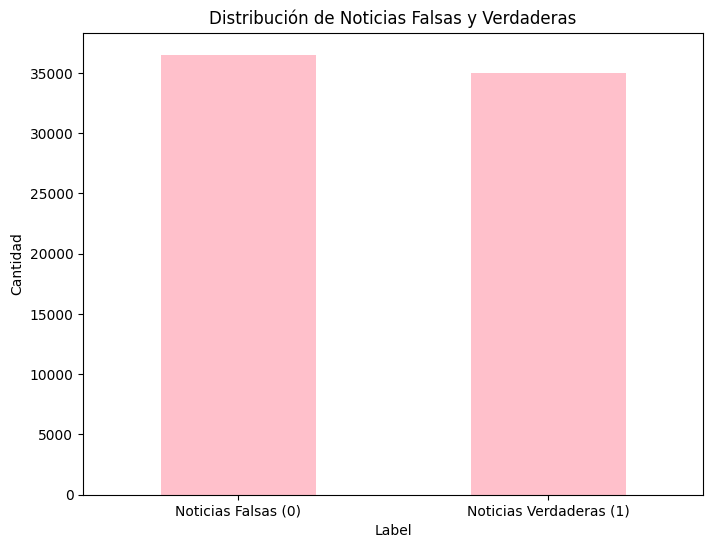

In [ ]:
import matplotlib.pyplot as plt

conteo_labels = df['label'].value_counts()
plt.figure(figsize=(8, 6))
conteo_labels.plot(kind='bar', color = 'pink')
plt.title('Distribución de Noticias Falsas y Verdaderas')
plt.xlabel('Label')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Noticias Falsas (0)', 'Noticias Verdaderas (1)'], rotation=0)
plt.show()


## Creación del modelo
### Tokenización y padding
La tokenización y el padding son procesos esenciales en el procesamiento de texto para modelos de aprendizaje automático. La tokenización convierte el texto en unidades discretas, como palabras o subpalabras, permitiendo al modelo entender la relación entre ellas dentro de una oración. Por otro lado, el padding consiste en agregar tokens adicionales al final de las secuencias para igualar sus longitudes, lo que facilita al modelo el procesamiento eficiente de secuencias de diferentes tamaños, centrándose en el contenido relevante más que en la longitud de las secuencias.
### Capas del modelo
El modelo contiene varias capas. El modelo utiliza una capa de embedding para convertir las palabras en vectores de características. La capa de embedding aprende a representar las palabras de manera que las palabras con significados similares tengan representaciones vectoriales similares.

La siguiente capa del modelo es una capa de red neuronal convolucional (CNN). La CNN aprende a identificar patrones en la secuencia de palabraso, como la presencia de ciertas palabras o frases.

La última capa del modelo es una capa de softmax, la cual convierte los valores de la CNN en probabilidades para cada clase.

## Épocas

La elección de 10 épocas para el entrenamiento del modelo busca un equilibrio entre la precisión del modelo y el tiempo de entrenamiento. 10 épocas son suficientes para que el modelo aprenda patrones relevantes y obtenga una buena precisión sin sobreentrenar, lo que permite un tiempo de entrenamiento razonable. Más épocas podría además crear un sobreentrenamiento y overfitting, reduciendo la efectividad del modelo.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Tokenizar el texto
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convertir textos a secuencias de enteros
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

# Convertir secuencias a vectores
X_train_padded = pad_sequences(X_train_tokens, maxlen=50, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_tokens, maxlen=50, padding='post', truncating='post')

In [ ]:
# Definición del modelo
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(2, activation="softmax"))

# Compilación del modelo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrenamiento del modelo
history = model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/10
1789/1789 [==============================] - 232s 128ms/step - loss: 0.1583 - accuracy: 0.9377 - val_loss: 0.1217 - val_accuracy: 0.9528
Epoch 2/10
1789/1789 [==============================] - 223s 125ms/step - loss: 0.0831 - accuracy: 0.9698 - val_loss: 0.1193 - val_accuracy: 0.9563
Epoch 3/10
1789/1789 [==============================] - 222s 124ms/step - loss: 0.0478 - accuracy: 0.9829 - val_loss: 0.1363 - val_accuracy: 0.9529
Epoch 4/10
1789/1789 [==============================] - 224s 125ms/step - loss: 0.0242 - accuracy: 0.9916 - val_loss: 0.1721 - val_accuracy: 0.9569
Epoch 5/10
1789/1789 [==============================] - 224s 125ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.1885 - val_accuracy: 0.9546
Epoch 6/10
1789/1789 [==============================] - 231s 129ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.2034 - val_accuracy: 0.9542
Epoch 7/10
1789/1789 [==============================] - 230s 128ms/step - loss: 0.0070 - accuracy: 0.9977 - val_

In [ ]:
from tensorflow.keras.models import save_model

# Guardar el modelo
model.save("/content/drive/MyDrive/UCamp/M5/modelo_fn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


448/448 [==============================] - 14s 31ms/step - loss: 0.2928 - accuracy: 0.9535
Precisión: 0.9534525871276855
Pérdida: 0.29275834560394287


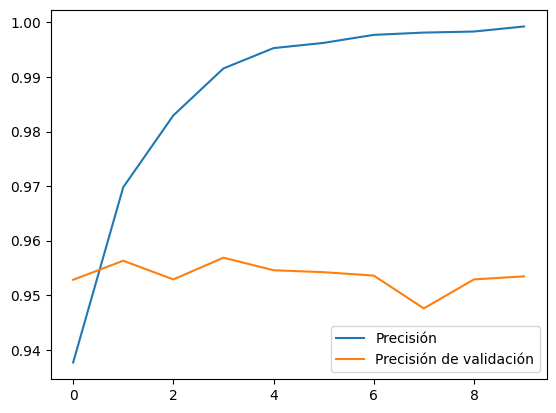

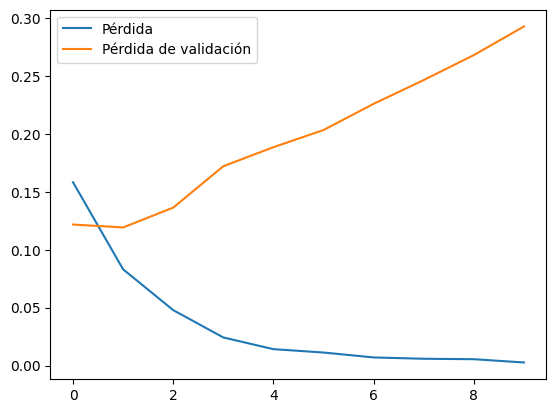

In [ ]:
# Precisión y pérdida
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Precisión: {accuracy}")
print(f"Pérdida: {loss}")

# Gráficas de precisión y pérdida
plt.plot(history.history["accuracy"], label="Precisión")
plt.plot(history.history["val_accuracy"], label="Precisión de validación")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Pérdida")
plt.plot(history.history["val_loss"], label="Pérdida de validación")
plt.legend()
plt.show()


### Análisis de las gráficas de precisión y entrenamiento:
La primera gráfica muestra la precisión del modelo, con un aumento constante en la precisión del entrenamiento (línea azul) que alcanza cerca del 100%, mientras que la precisión de validación (línea naranja) se mantiene alrededor del 95% sin signos claros de mejora después de las primeras épocas. Esto significa que a partir de la quinta época no hay gran mejora en la precisión. De haber muchas más épocas, se podría sobreentrenar el modelo.

En contraste, la segunda gráfica de pérdida muestra una disminución pronunciada en la pérdida de entrenamiento (línea azul), que se aproxima a cero, mientras que la pérdida de validación (línea naranja) aumenta después de las primeras épocas, lo que podría ser un signo de sobreajuste.

A pesar de esto, el resultado dio buenos resultados en la predicción de variables.

### Comporbación con dos variables

Para la noticia verdadera, el modelo dio una probabilidad [0.6217454 0.37825453]. Esto indica que el modelo predice la muestra como una noticia verdadera con una probabilidad de aproximadamente 62.17% y una noticia falsa con una probabilidad de aproximadamente 37.82%.

Para la noticia falsa, el modelo ha dado como salida una probabilidad [2.9072098e-06 9.9999714e-01]. Esto indica que el modelo predice la muestra como una noticia verdadera con una probabilidad extremadamente baja (cercana a 0) y una noticia falsa con una probabilidad muy alta (casi 100%).

Es decir, el modelo es más eficiente para predecir noticias falsas que verdaderas.

In [ ]:
from bs4 import BeautifulSoup
import requests

# Función para extraer el texto de una noticia
def extraer_texto(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    textos_noticia = soup.find_all("div", class_=["article-body", "zn-body__paragraph"])
    if textos_noticia is None or len(textos_noticia) == 0:
        return ""
    texto_plano = ""
    for texto in textos_noticia:
        texto_plano += texto.text.strip().replace("\n", " ")
    return texto_plano


# URL de la noticia
noticia_falsa_url = "https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/"
noticia_verdadera_url = "https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/"

# Extraer el texto de la noticia
noticia_falsa_texto = extraer_texto(noticia_falsa_url)
noticia_verdadera_texto = extraer_texto(noticia_verdadera_url)

# Imprimir el texto
print(f"Noticia falsa:\n{noticia_falsa_texto}")
print(f"\nNoticia verdadera:\n{noticia_verdadera_texto}")

Noticia falsa:


Noticia verdadera:
Kathryn Nesbitt had spent a decade balancing parallel careers in analytical chemistry and soccer officiating when, in 2019, she put her scientific brain to work and synthesized a solution for the most pragmatic path forward.Two weeks before Nesbitt left for France to serve as an assistant referee at the Women’s World Cup, she stepped down from her assistant professor position at Towson University to focus on officiating full time. What data points informed that decision? She reached the pinnacle of women’s soccer refereeing that summer and had broken into top-flight men’s soccer as well, with dozens of MLS games under her belt. Knowing the 2026 men’s World Cup would be held in the United States, Canada and Mexico, Nesbitt mapped out a plan that would culminate in her being on the sideline of the sport’s premier spectacle.“I had no idea if they’d ever let women officiate at that World Cup, but I wanted to see if I could do that,” said Nesbitt, 34. “I 

In [ ]:
noticia_falsa_texto = """Exposed: FBI Director James Comey’s Clinton Foundation Connection
230,236
Democratic presidential candidate Hillary Clinton speaks during a campaign stop, WednesdayAP Photos
PATRICK HOWLEY10 Sep 201637,736
WASHINGTON, D.C. — A review of FBI Director James Comey’s professional history and relationships shows that the Obama cabinet leader — now under fire for his handling of the investigation of Hillary Clinton — is deeply entrenched in the big-money cronyism culture of Washington, D.C. His personal and professional relationships — all undisclosed as he announced the Bureau would not prosecute Clinton — reinforce bipartisan concerns that he may have politicized the criminal probe.

These concerns focus on millions of dollars that Comey accepted from a Clinton Foundation defense contractor, Comey’s former membership on a Clinton Foundation corporate partner’s board, and his surprising financial relationship with his brother Peter Comey, who works at the law firm that does the Clinton Foundation’s taxes.

Lockheed Martin

When President Obama nominated Comey to become FBI director in 2013, Comey promised the United States Senate that he would recuse himself on all cases involving former employers.

But Comey earned $6 million in one year alone from Lockheed Martin. Lockheed Martin became a Clinton Foundation donor that very year.

Comey served as deputy attorney general under John Ashcroft for two years of the Bush administration. When he left the Bush administration, he went directly to Lockheed Martin and became vice president, acting as a general counsel.

How much money did James Comey make from Lockheed Martin in his last year with the company, which he left in 2010? More than $6 million in compensation.

Lockheed Martin is a Clinton Foundation donor. The company admitted to becoming a Clinton Global Initiative member in 2010.

According to records, Lockheed Martin is also a member of the American Chamber of Commerce in Egypt, which paid Bill Clinton $250,000 to deliver a speech in 2010.

In 2010, Lockheed Martin won 17 approvals for private contracts from the Hillary Clinton State Department.

HSBC Holdings

In 2013, Comey became a board member, a director, and a Financial System Vulnerabilities Committee member of the London bank HSBC Holdings.

“Mr. Comey’s appointment will be for an initial three-year term which, subject to re-election by shareholders, will expire at the conclusion of the 2016 Annual General Meeting,” according to HSBC company records.

HSBC Holdings and its various philanthropic branches routinely partner with the Clinton Foundation. For instance, HSBC Holdings has partnered with Deutsche Bank through the Clinton Foundation to “retrofit 1,500 to 2,500 housing units, primarily in the low- to moderate-income sector” in “New York City.”

“Retrofitting” refers to a Green initiative to conserve energy in commercial housing units. Clinton Foundation records show that the Foundation projected “$1 billion in financing” for this Green initiative to conserve people’s energy in low-income housing units.

Who Is Peter Comey?

When our source called the Chinatown offices of D.C. law firm DLA Piper and asked for “Peter Comey,” a receptionist immediately put him through to Comey’s direct line. But Peter Comey is not featured on the DLA Piper website.

Peter Comey serves as “Senior Director of Real Estate Operations for the Americas” for DLA Piper. James Comey was not questioned about his relationship with Peter Comey in his confirmation hearing.

DLA Piper is the firm that performed the independent audit of the Clinton Foundation in November during Clinton-World’s first big push to put the email scandal behind them. DLA Piper’s employees taken as a whole represent a major Hillary Clinton 2016 campaign donation bloc and Clinton Foundation donation base.

DLA Piper ranks #5 on Hillary Clinton’s all-time career Top Contributors list, just ahead of Goldman Sachs.

And here is another thing: Peter Comey has a mortgage on his house that is owned by his brother James Comey, the FBI director.

Peter Comey’s financial records, obtained by Breitbart News, show that he bought a $950,000 house in Vienna, Virginia, in June 2008. He needed a $712,500 mortgage from First Savings Mortgage Corporation.

But on January 31, 2011, James Comey and his wife stepped in to become Private Party lenders. They granted a mortgage on the house for $711,000. Financial records suggest that Peter Comey took out two such mortgages from his brother that day.

This financial relationship between the Comey brothers began prior to James Comey’s nomination to become director of the FBI.

DLA Piper did not answer Breitbart News’ question as to whether James Comey and Peter Comey spoke at any point about this mortgage or anything else during the Clinton email investigation.

Peter Comey Re-Designed the FBI Building

FBI Director James Comey grew up in the New Jersey suburbs with his brother Peter. Both Comeys were briefly taken captive in 1977 by the “Ramsey rapist,” but the boys managed to escape through a window in their home, and neither boy was harmed.

James Comey became a prosecutor who worked on the Gambino crime family case. He went on to the Bush administration, a handful of private sector jobs, and then the Obama administration in 2013.

Peter Comey, meanwhile, went into construction.

After getting an MBA in real estate and urban development from George Washington University in 1998, Peter Comey became an executive at a company that re-designed George Washington University between 2004 and 2007 while his brother was in town working for the Bush administration.

In January 2009, at the beginning of the Obama administration, Peter Comey became “a real estate and construction consultant” for Procon Consulting.

Procon Consulting’s client list includes “FBI Headquarters Washington, DC.”

So what did Procon Consulting do for FBI Headquarters? Quite a bit, apparently. According to the firm’s records:

Procon provided strategic project management for the consolidation of over 11,000 FBI personnel into one, high security, facility.

Since 1972 the Federal Bureau of Investigation has had its headquarters in a purpose built 2.1 million square foot building on Pennsylvania Avenue. Having become functionally obsolete and in need of major repairs, GSA and the FBI were considering ways to meet the space needs required to maintain the Bureau’s mission and consolidate over 11,000 personnel.

Procon assisted GSA in assessing the FBI’s space needs and options for fulfilling those needs. Services provided included project management related to site evaluations, budgeting, due diligence, and the development of procurement and funding strategies.

Those “funding strategies” included talking to “stakeholders”: “Worked with stakeholders and key leadership to identify strategic objectives, goals and long range plans for capital and real estate projects.”

Procon Consulting obtained its contract for FBI Headquarters prior to James Comey’s nomination to serve as director of the FBI.

In June 2011, Peter Comey left Procon Consulting to become “Senior Director of Real Estate Operations for the Americas” for DLA Piper.

Peter Comey has generated some controversy in that role. According to Law360 in May 2013 (the same month that James Comey was confirmed as someone being considered by Obama to become FBI director):

Two real estate services businesses filed a $10 million suit against the law firm Monday alleging it stiffed them on as much as $760,000 of work done at DLA Piper’s Chicago office and improperly gave proprietary information to a competitor.

….

The plaintiffs take particular aim at Peter Comey, DLA Piper’s senior director of real estate operations. Leasecorp and SpaceLogik include several emails in the complaint that are purportedly from DLA Piper senior real estate partners Jay Epstein and Rich Klawiter and are sharply critical of Comey’s handling of the matter. In one email, Epstein wrote that “it’s an embarrassment for the firm to be treating someone who we are working with like this.”

In another email allegedly from Klawiter on Feb. 20, the DLA Piper partner informed Leasecorp President Michael Walker, a principal for both plaintiffs, that Comey had sent him and Epstein an email claiming that the real estate services firms were behind on their contractual obligations.

“I just received an email from Peter (Jay was also a recipient) that is so inflammatory I can’t even send it or you’ll hit the roof,” Klawiter said in the email, according to the complaint. “This is not going to end well.”"""

In [ ]:
noticia_falsa_texto = " ".join([stemmer.stem(word) for word in noticia_falsa_texto.split() if word not in STOPWORDS])
noticia_verdadera_texto = " ".join([stemmer.stem(word) for word in noticia_verdadera_texto.split() if word not in STOPWORDS])

In [ ]:
noticia_verdadera_tokens = tokenizer.texts_to_sequences([noticia_verdadera_texto])
noticia_verdadera_pad = np.pad(noticia_verdadera_tokens, ((0, 0), (0, 50)))
prediccion_verdadera = model.predict(noticia_verdadera_pad)
print(f"Predicción noticia verdadera: {prediccion_verdadera}")

1/1 [==============================] - 0s 103ms/step
Predicción noticia verdadera: [[0.6217454  0.37825453]]


In [ ]:
noticia_falsa_tokens = tokenizer.texts_to_sequences([noticia_falsa_texto])
noticia_falsa_pad = np.pad(noticia_falsa_tokens, ((0, 0), (0, 50)))
prediccion_falsa = model.predict(noticia_falsa_pad)
print(f"Predicción noticia falsa: {prediccion_falsa}")

1/1 [==============================] - 0s 118ms/step
Predicción noticia falsa: [[2.9072098e-06 9.9999714e-01]]


## Conclusión

En conclusión, aunque el modelo demuestra una capacidad notable para memorizar el conjunto de entrenamiento, su rendimiento en el conjunto de validación es subóptimo y probablemente no se mantendrá en un conjunto de prueba independiente.

Para mejorar el modelo, se podrían implementar técnicas de regularización como el abandono (dropout), o posiblemente utilizar técnicas de bagging o boosting para combinar las fortalezas de varios modelos. Sin embargo, para eso, se necesitaría equipo con mayor capacidad para poder soportar dicha red neuronal.

Sin embargo, el modelo podría servir como apoyo, aunque en el caso de noticias, el factor humano de comprobación e investigación sobre el contenido de las noticias también es importante.

# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


## Justificación
La arquitectura de la red neuronal convolucional (CNN) diseñada para clasificar dígitos manuscritos del MNIST tiene capas convolucionales, de pooling y densas, cada con una función específica:

Capas convolucionales: Usé filtros de 3x3 para captar patrones básicos y complejos en los datos. La profundidad de los filtros aumenta con cada capa convolucional para extraer características cada vez más sofisticadas.

Capas de pooling: Reducen la dimensionalidad de los datos, disminuyendo los cálculos necesarios y previniendo el sobreajuste.

Capas densas: Después de aplanar las características convolucionales en un vector, una capa densa intermedia introduce no linealidades (la capacidad de una red neuronal para capturar y modelar relaciones complejas y no lineales entre los datos de entrada y las etiquetas o resultados de salida), mientras que la capa de salida con activación softmax distribuye las probabilidades entre las diez clases de dígitos.

Este modelo tuvo una buena precisión con 5 épocas, debido en parte a que es un conjunto de datos muy cuidado para práctica.

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalizar datos de entrada para que sus valores estén en el rango de 0 a 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensionando las imágenes para que tengan un solo canal de color
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [ ]:
# Crear modelo de las Capas Convolucionales
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Agregar capas densas en la parte superior
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1487 - accuracy: 0.9537 - val_loss: 0.0462 - val_accuracy: 0.9846
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0315 - val_accuracy: 0.9901
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0350 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.0302 - val_accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 0.0428 - val_accuracy: 0.9874


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nPrecisión:', test_acc)

313/313 - 2s - loss: 0.0428 - accuracy: 0.9874 - 2s/epoch - 6ms/step

Precisión: 0.9873999953269958


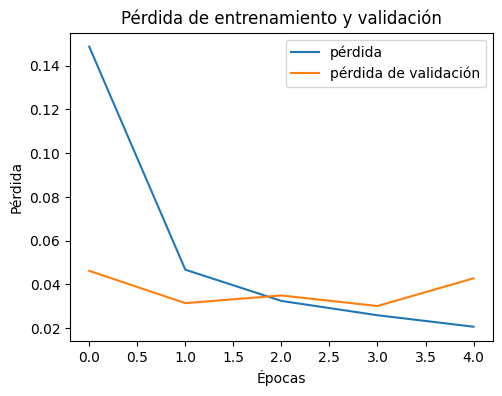

In [ ]:
# Graficando la pérdida de entrenamiento y validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='pérdida')
plt.plot(history.history['val_loss'], label='pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

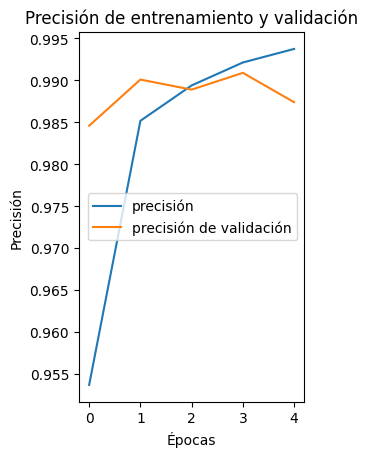

In [ ]:
# Graficando la precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='precisión')
plt.plot(history.history['val_accuracy'], label='precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

## Precisión y pérdida del modelo

En la primera gráfica, se ve que la pérdida de entrenamiento disminuye rápidamente y luego se estabiliza, mientras que la pérdida de validación disminuye de forma más gradual, indicando que el modelo está aprendiendo efectivamente de los datos y generalizando bien a datos no vistos.

La segunda gráfica muestra un aumento rápido en la precisión de entrenamiento que alcanza valores muy altos, mientras que la precisión de validación, a pesar de algunas fluctuaciones, sigue una tendencia ascendente. Esto sugiere que el modelo clasifica con alta exactitud tanto en los datos de entrenamiento como en los de validación.

Estos resultados señalan un buen ajuste del modelo, con un equilibrio adecuado entre sesgo y varianza, y una capacidad de generalización efectiva

### Predicciones con elementos del dataset

El conjunto de predicciones realizado por el modelo muestra un alto grado de precisión, acertando en 9 de las 10 imágenes. El único error se presentó en la primera imagen, donde el modelo predijo un 7 en lugar del valor real que era un 9. Las demás predicciones coinciden con las etiquetas reales, lo que indica que el modelo es altamente efectivo en la clasificación de dígitos manuscritos del conjunto de datos MNIST.

In [ ]:
predicciones = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [ ]:
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
test_images = x_test[random_indices]
test_labels = y_test[random_indices]
predicted_labels = np.argmax(predicciones[random_indices], axis=1)

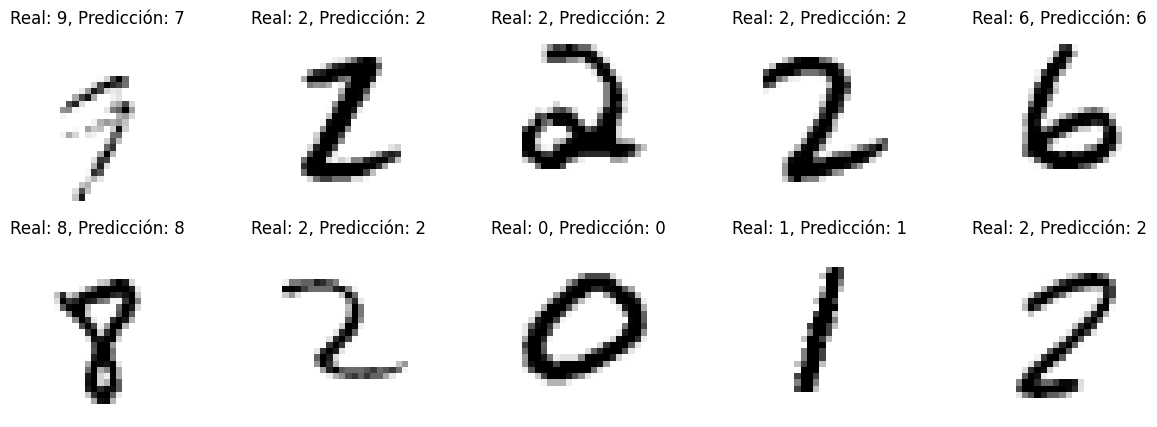

In [ ]:
# Mostrar imágenes con etiquetas
plt.figure(figsize=(15, 5))
for i, (image, label, prediction) in enumerate(zip(test_images, test_labels, predicted_labels)):
    plt.subplot(2, 5, i+1)
    plt.imshow(np.squeeze(image), cmap=plt.cm.binary)
    plt.title(f"Real: {label}, Predicción: {prediction}")
    plt.axis('off')
plt.show()

In [ ]:
# Imprimir predicciones para revisión
for i in range(10):
    print(f"Imagen {i+1}: Etiqueta real - {test_labels[i]}, Etiqueta predicha - {predicted_labels[i]}")

Imagen 1: Etiqueta real - 9, Etiqueta predicha - 7
Imagen 2: Etiqueta real - 2, Etiqueta predicha - 2
Imagen 3: Etiqueta real - 2, Etiqueta predicha - 2
Imagen 4: Etiqueta real - 2, Etiqueta predicha - 2
Imagen 5: Etiqueta real - 6, Etiqueta predicha - 6
Imagen 6: Etiqueta real - 8, Etiqueta predicha - 8
Imagen 7: Etiqueta real - 2, Etiqueta predicha - 2
Imagen 8: Etiqueta real - 0, Etiqueta predicha - 0
Imagen 9: Etiqueta real - 1, Etiqueta predicha - 1
Imagen 10: Etiqueta real - 2, Etiqueta predicha - 2


### Conclusión
El modelo de red neuronal convolucional entrenado para la clasificación de dígitos manuscritos resultó ser altamente efectivo, como se ve en su notable precisión en el conjunto de validación y su capacidad para generalizar correctamente a nuevos datos. Con una tasa de acierto del 90% en el conjunto de prueba de 10 elementos, el modelo muestra un excelente rendimiento.

En general, estos resultados son prometedores para aplicaciones prácticas en la automatización de la lectura y clasificación de números escritos a mano.